<a href="https://colab.research.google.com/github/ParthikB/encryption/blob/master/encryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
from keras.preprocessing import image

import numpy as np
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [0]:
def loadImage(path_to_img):
  # max_dim = 512
  img2show = Image.open(path_to_img)
  # long = max(img2show.size)
  # scale = max_dim/long
  # img = img2show.resize((round(img2show.size[0]*scale), round(img2show.size[1]*scale)), Image.ANTIALIAS)
  
  img = image.img_to_array(img2show)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  # We need to broadcast the image array such that it has a batch dimension 
  # img = np.expand_dims(img2show, axis=0)
  return img2show, img

In [0]:
imgShow, imgArr = loadImage('/content/drive/My Drive/Colab Notebooks/encryption/image1.jpg')

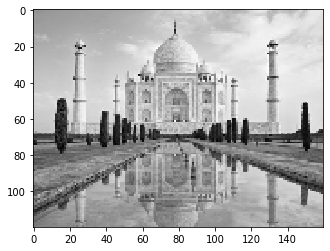

In [0]:
plt.imshow(imgArr, cmap='gray')

In [0]:
imgArr.shape

(480, 640)

In [0]:
np.prod(imgArr.shape)

307200

In [0]:
# Resizing the image as the RAM coudn't take it!

height = imgArr.shape[0] // 4 
width  = imgArr.shape[1] // 4

imgArr = cv2.resize(imgArr, (width, height))
np.prod(imgArr.shape)

19200

In [0]:
# Creating the input and output unrolled vectors (psst, both are the same!)
y = yhat = imgArr.reshape(np.prod(imgArr.shape), -1)

In [0]:
def build_model():
  model = tf.keras.Sequential([
      # tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(19200, activation='relu'),
      tf.keras.layers.Dense(19200, activation='relu'),
      # tf.keras.layers.Dense(307200, activation='relu'),
      # tf.keras.layers.Dense(307200, activation='relu')
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

  return model

In [0]:
model = build_model()

In [0]:
# Fitting the model

EPOCHS = 10

history = model.fit(
  y, yhat,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
history.history

{'acc': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'loss': [14499.816473388672,
  14308.373864746094,
  14307.765059407551,
  14306.398834228516,
  14301.036309814453,
  14298.435756429037,
  14295.353177897136,
  14293.645141601562,
  14291.706190999348,
  12933.655470784504],
 'val_acc': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_loss': [10678.863045247395,
  10676.417464192707,
  10676.417301432291,
  10673.972526041667,
  10670.305297851562,
  10667.860538736979,
  10666.638134765624,
  10665.41572265625,
  10661.74854329427,
  7817.2320271809895]}

In [0]:
# Predicting the output of the image
output = model.predict(y)

In [0]:
# WEIRD SHAPE? WHAT IS THIS????????????????????????
output.shape

(19200, 19200)

In [0]:
# Anyways, we'll take the first dimension of the output

# Resizing into a 2D Matrix, basically converting it into image dimensions!
oImage = cv2.resize(output[0], (width, height))

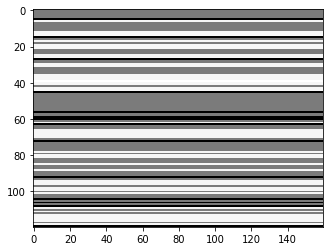

In [0]:
# Plotting
plt.gray()
plt.imshow(oImage)

In [0]:
'''
NOTES:

  > Find out what is that weird shape of the output!
  > The final image has to be approximately the same, not this strange lines. Fix this.
  > Try implementing this in PyTorch. That would be a lot easier to manipulate!

'''